### Polynomial Curve Fitting

This is an interactive implementation of example 1.1 from Christopher Bishop's highly recommended book [Pattern Recognition and Machine Learning](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738).

In this example we generate a random dataset according to a normal distribution and perform a least squares linear regression fit to the randomly generated data using a user definable degree of polynomial. The hope in creating this notebook was to help bring a bit of intuition for individuals interested in learning more about a least squares linear regression model, much in the way the book does, by bringing some interaction forward for users to be able to tweak parameters of the model.

This should help provide some intuition on understanding what something like "over-fitting" may look like on a simple linear regression problem.

In [35]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widget
from IPython.display import display

from math import pi, sin
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge

%matplotlib inline

In [15]:
def target(x):
    '''
    Function to generate target variables
    
    '''
    return sin(2 * pi * x) + np.random.normal(scale=0.3)

def example_data_generating_dist(size):
    '''
    Function to generate example data
    
    size = size of data set to generate
    '''
    data = []

    for i in range(size):
        x = np.random.uniform()
        y = target(x)
        data.append([x,y])
    arr = np.array(data)
    x = np.array(arr[:,0])
    y = np.array(arr[:,1])
    return x, y

def polyfit(x, y, degree):
    '''
    Fit a polynomaial to some data
    '''
    _coef = np.polyfit(x,y,degree)
    _poly = np.poly1d(_coef)
    _ys = _poly(y)
    
    return _poly

def graph_polyfit(degree, size):
    
    x, y = example_data_generating_dist(size)
    
    model = polyfit(x, y, degree)
    xp = np.linspace(-1, 1, 50)

    plt.ylim(y.min()-.2, y.max()+.2)
    plt.xlim(x.min()-.2, x.max()+.2)
    
    plt.plot(x, y, '.', xp, model(xp), '--')

    plt.show()
    return model

### Underfit

Simple example of an underfit for our model. We can see that a simple 1st, or 2nd degree polynomial doesn't sufficiently capture the underlying function that is generating our data. In this case $sin(2\pi x)$.

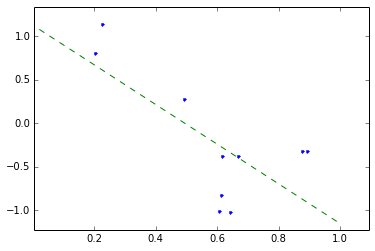

poly1d([-2.28640336,  1.13093821])

In [28]:
graph_underfit = interactive(graph_polyfit, degree=1, size=10)
graph_underfit

### Overfit

Just as we show in the example above, we can also generate another example of what would be considered an overfitting of our $sin(2\pi x)$ function.

As you can see, the 9th degree polynomial oscillates wildly between the different datapoints in an effort to find a best fit that ends up being too "close" to the data that the model sees.

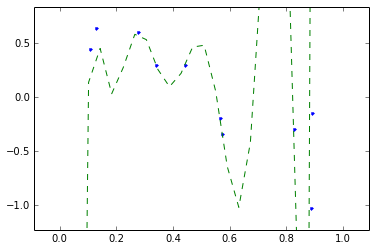

poly1d([  7.68084628e+05,  -3.23157962e+06,   5.78666581e+06,
        -5.76302737e+06,   3.50099986e+06,  -1.33829729e+06,
         3.20067028e+05,  -4.59084228e+04,   3.56423862e+03,
        -1.13373029e+02])

In [29]:
graph_overfit = interactive(graph_polyfit, degree=9, size=10)
graph_overfit

### Just right

This is an example of a good, overall, fit to the data. We can see that the function is smooth and does not oscillate wildly between the datapoints.

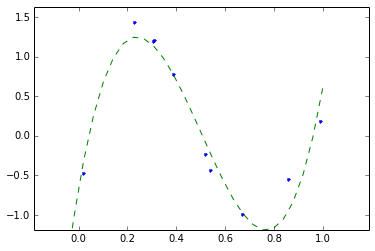

poly1d([ 32.7306674 , -49.39380151,  17.94340625,  -0.66540104])

In [31]:
graph_just_right = interactive(graph_polyfit, degree=3, size=10)
graph_just_right

### Regularization -- More Data

There are multiple ways that we can deal with overfitting. The easiest way is, if you can, just get more data from the system it is that you're trying to model. This will help the model to generalize to your dataset using more examples.

Remember that when dealing with a least squares fit, you're working to minimize the _sum_ of the squares of the errors 
between between our predictions $y(x_n, w) \ \forall \ x \in X$ and their corresponding target values $t_n$. 

$$ E(w) = \frac{1}{2}\{y(x_n, w) - t_n\}^2$$

Intuitively you can imagine that this minimization over a larger summation of datapoints, allows more and more data to "push" and "pull" on the function approximating the data, creating a smoothing of the function in the process.

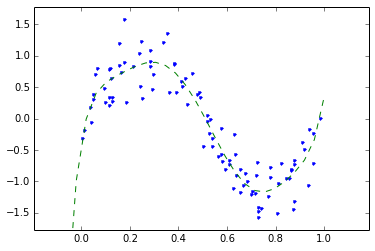

poly1d([  1.67315598e+03,  -7.20479112e+03,   1.36622684e+04,
        -1.52065377e+04,   1.09437919e+04,  -5.10453997e+03,
         1.45573630e+03,  -2.41826531e+02,   2.34946290e+01,
        -3.99902288e-01])

In [33]:
graph_reg = interactive(graph_polyfit, degree=9, size=100)
graph_reg

You can see above, just be sampling 90 more data points from our mock function, the 9th degree polynomial is already starting to smooth out a bunch. If you grab the `size` slider and move it to the right, generating more sample data, you'll see that the recomputed polynomial that is modeling the data smooths even more. Giving us this regularization affect.

### Regularization - when it's hard to get more data

If you can't get your hands on more data from the system that has produced the data, then you may have to move into the realm of adding a penalty to your cost, or error, function $E(w)$.

A common penalization to add to our error function is the sum of the squares of all parameters, or coefficients, of the model.

$$ E(w) = \frac{1}{2}\{y(x_n, w) - t_n\}^2 + \frac{\lambda}{2}\|w\|^2$$

where $\|w\|^2 = w^Tw = w_0^2 + w_1^2 + w_3^2 ... w_M^2$. The coefficient $\lambda$ is what governs the relative importants of the regularization effect on the model.

In [62]:
# generate some random data and target values
rr_X, rr_y = example_data_generating_dist(100)

In [60]:
rr_y

array([-0.29085309,  0.99255478,  0.65144592,  0.72407791,  0.43446178,
       -0.92695187, -0.65801194, -0.54308427, -1.14192648,  0.71669174,
       -0.21520924, -0.03194886,  0.13933688,  0.37076975,  1.57069626,
       -0.8634242 ,  0.33453173, -1.54635042, -0.48494725, -0.10221201,
        0.12398545,  1.05191016, -0.10675557,  1.01580794,  0.39021641,
        0.70410217,  0.74478408,  0.56153662, -0.84234846,  0.72641871,
        1.04426655,  0.46088555,  0.36306463,  0.84343778, -0.08501795,
       -0.64883542, -0.36723085, -0.45465546, -0.58274869, -0.34060161,
       -1.00242698,  0.51998301,  0.7827885 ,  0.87097285,  0.20201265,
       -0.31370883, -0.59052355,  0.23194184, -0.91538903,  0.09491556,
        0.42723614, -0.74811599,  0.3491822 ,  0.8308746 ,  1.42037689,
       -0.18502007, -0.17522596,  0.46556108,  0.87965163, -0.27290086,
        0.94957174,  1.25346067, -0.77642278,  0.69714418, -0.43070493,
       -1.05007236, -0.11134356, -0.86791723, -0.71026929,  0.48

In [79]:
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(rr_X[:,np.newaxis], rr_y)

/usr/lib/python2.7/dist-packages/scipy/sparse/sputils.py:141: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(M) == 0 and np.rank(N) == 0:


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='lsqr', tol=0.001)

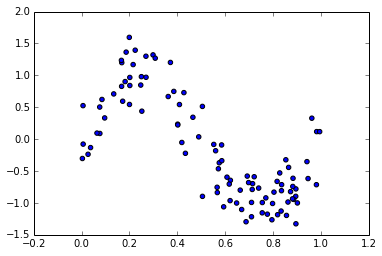

In [80]:
plt.scatter(rr_X, rr_y)

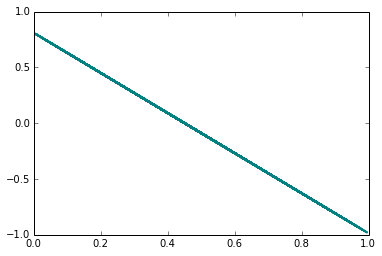

In [87]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
for count, degree in enumerate([2]):
    model = Ridge()
    model.fit(rr_X[:,np.newaxis], rr_y)
    y_plot = model.predict(rr_X[:,np.newaxis])
    plt.plot(rr_X, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)